In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

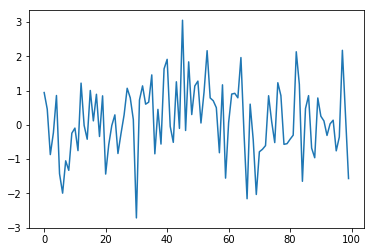

In [3]:
df.Stationary.plot()

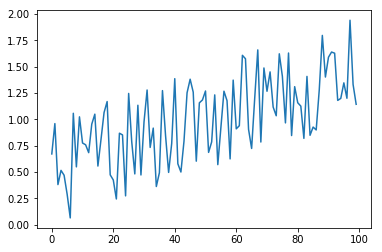

In [4]:
df.Nonstationary.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

In [6]:
adfuller(df.Stationary)

(-8.946929750739162,
 8.936309384406441e-15,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 257.1545471663376)

In [7]:
df['pct_change'] = df.Nonstationary.pct_change()

In [8]:
df.head()

,Stationary,Nonstationary,pct_change
0,0.943546,0.672336,NaN
1,0.458599,0.960092,0.427994
2,-0.868507,0.381674,-0.602461
3,-0.231578,0.516430,0.353065
4,0.857090,0.470286,-0.089352


In [9]:
df.dropna(inplace=True)

ADF Statistic: -4.752327
p-value:        0.000067 
Lags used:      4
Critical Values:
('1%', -3.5019123847798657)
('5%', -2.892815255482889)
('10%', -2.583453861475781)


True

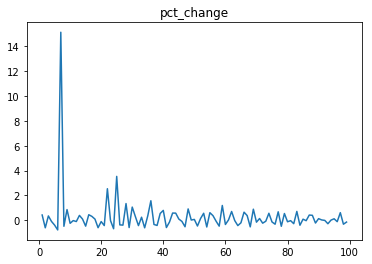

In [12]:
is_stationary(df['pct_change'])

In [13]:
df['change'] = df.Nonstationary.diff()

In [15]:
df.head()

,Stationary,Nonstationary,pct_change,change
1,0.458599,0.960092,0.427994,NaN
2,-0.868507,0.381674,-0.602461,-0.578418
3,-0.231578,0.516430,0.353065,0.134756
4,0.857090,0.470286,-0.089352,-0.046144
5,-1.428921,0.288852,-0.385794,-0.181433


In [16]:
df.dropna(inplace=True)


ADF Statistic: -8.741726
p-value:        0.000000 
Lags used:      3
Critical Values:
('1%', -3.5019123847798657)
('5%', -2.892815255482889)
('10%', -2.583453861475781)


True

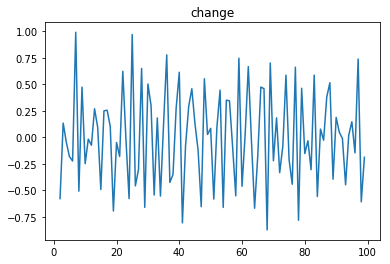

In [17]:
is_stationary(df['change'])